# Advanced topic: Snowball Earth and Large Ice Cap Instability in the EBM

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook) by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

*These notes and the companion [Advanced topic: Ice albedo feedback in the EBM](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/advanced-albedo-feedback.html) extend the material in the [Ice-albedo feedback and Snowball Earth in the EBM](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/albedo-snowball.html) notes.*

<div class="alert alert-warning">
Unlike most of the other notebooks in this series, this one performs some intensive computations and may take more than an hour to run from start to finish (your mileage may vary).
</div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from climlab import constants as const
import climlab

____________
<a id='section1'></a>

## 1. The Neoproterozoic Snowball Earth events
____________



### The Geologic Time Scale

First, some information on the nomenclature for Earth history:

<img src='../images/GeoTimeScale2009.png'>

Source: Walker, J. and Geissman, J. (2009). Geologic time scale. Technical report, Geological Society of America.

### Extensive evidence for large glaciers at sea level in the tropics 

Evidently the climate was **very cold** at these times (635 Ma and 715 Ma)

<img src='../images/Hoffman_Li_2009.png'>

Source: [Hoffman, P. F. and Li, Z.-X. (2009). A palaeogeographic context for Neoproterozoic glaciation. Palaeogeogr. Palaeoclimatol. Palaeoecol., 277:158–172.](https://doi.org/10.1016/j.palaeo.2009.03.013)

<img src='../images/Hoffman_Schrag_2002_Fig2.png'>

Source: [Hoffman, P. F. and Schrag, D. P. (2002). The snowball Earth hypothesis: testing the limits of global change. Terra Nova, 14(3):129–155.](https://doi.org/10.1046/j.1365-3121.2002.00408.x)

###  The Snowball Earth hypothesis

Various bizarre features in the geological record from 635 and 715 Ma ago indicate that the Earth underwent some very extreme environmental changes… at least twice. The **Snowball Earth hypothesis** postulates that:

- The Earth was completely ice-covered (including the oceans)
- The total glaciation endured for millions of years
- CO$_2$ slowly accumulated in the atmosphere from volcanoes
- Weathering of rocks (normally acting to reduce CO$_2$) extremely slow due to cold, dry climate
- Eventually the extreme greenhouse effect is enough to melt back the ice
- The Earth then enters a period of extremely hot climate.

The hypothesis rests on a phenomenon first discovered by climate modelers in the Budyko-Sellers EBM: **runaway ice-albedo feedback** or **large ice cap instability**.

____________
<a id='section2'></a>

## 2. Stability of the polar ice caps: the concept
____________


<img src='../images/large_ice_cap_sketch.png'>

For small perturbations, we can relate the cooling to the displacement of the ice edge as:

$$  \delta T = -\frac{dT}{d\phi} \bigg|_{\phi_i} \delta \phi  $$

### Stability criterion:

$$ \frac{\delta a ~ S(\phi_i) ~ \cos\phi_i}{B} < -\frac{dT}{d\phi} \bigg|_{\phi_i} \delta \phi  $$

The LHS is **largest at the equator**, while the RHS is **large in mid-latitudes and near zero at the equator**.

The conclusion:  **The ice will always grow unstably toward the equator once it reaches some critical latitude.**

This is called **Large Ice Cap Instability**, and was first discovered in the Budyko-Sellers EBM.

See [Rose (2015), J. Geophys. Res., doi:10.1002/2014JD022659](http://onlinelibrary.wiley.com/doi/10.1002/2014JD022659/abstract)

____________
<a id='section3'></a>

## 3. Annual-mean EBM with albedo feedback: adjustment to equilibrium
____________

Here we will use the 1-dimensional diffusive Energy Balance Model (EBM) to explore the effects of albedo feedback and heat transport on climate sensitivity.

In [2]:
#  for convenience, set up a dictionary with our reference parameters
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10., 'D':0.55}
model1 = climlab.EBM_annual(name='Annual Mean EBM with ice line', num_lat=180, **param )
print(model1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Annual Mean EBM with ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>



In [3]:
model1.integrate_years(5)
Tequil = np.array(model1.Ts)
ALBequil = np.array(model1.albedo)
OLRequil = np.array(model1.OLR)
ASRequil = np.array(model1.ASR)

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.


Total elapsed time is 5.000000000000044 years.


Let's look at what happens if we perturb the temperature -- make it 20ºC colder everywhere!

In [4]:
model1.Ts -= 20.
model1.compute_diagnostics()

Let's take a look at how we have just perturbed the absorbed shortwave:

Text(0, 0.5, 'ASR (W m$^{-2}$)')

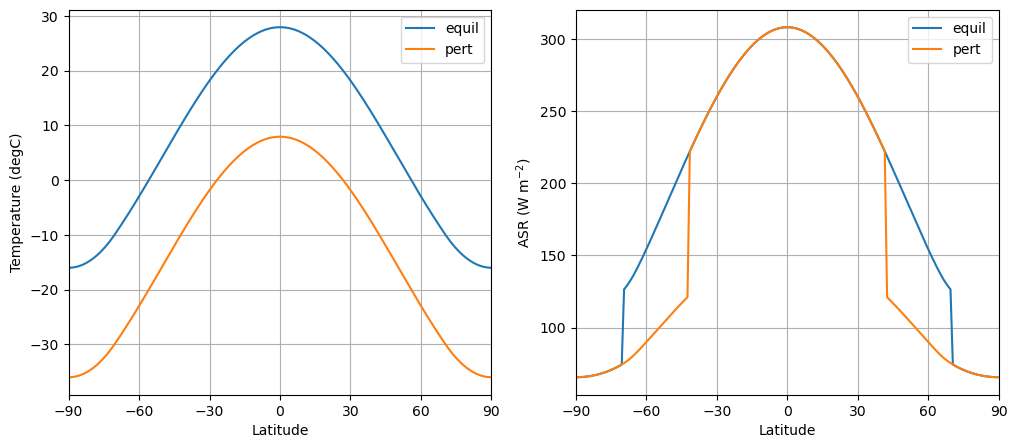

In [5]:
my_ticks = [-90,-60,-30,0,30,60,90]
lat = model1.lat

fig = plt.figure( figsize=(12,5) )

ax1 = fig.add_subplot(1,2,1)
ax1.plot(lat, Tequil, label='equil') 
ax1.plot(lat, model1.state['Ts'], label='pert' )
ax1.grid()
ax1.legend()
ax1.set_xlim(-90,90)
ax1.set_xticks(my_ticks)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (degC)')

ax2 = fig.add_subplot(1,2,2)
ax2.plot( lat, ASRequil, label='equil') 
ax2.plot( lat, model1.diagnostics['ASR'], label='pert' )
ax2.grid()
ax2.legend()
ax2.set_xlim(-90,90)
ax2.set_xticks(my_ticks)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('ASR (W m$^{-2}$)')

So there is less absorbed shortwave now, because of the increased albedo. The global mean difference is:

In [6]:
climlab.global_mean( model1.ASR - ASRequil )

array(-20.37440018)

Less shortwave means that there is a tendency for the climate to cool down even more! In other words, the shortwave feedback is **positive**.

____________
<a id='section4'></a>

## 4. Global feedback analysis in the EBM
____________

Take the global mean of the EBM equation, the transport term drops out

$$ C \frac{\partial \langle T_s \rangle}{\partial t} = \langle (1-\alpha) ~ Q \rangle - ~A - B~\langle T_s \rangle $$


Way back in [Lecture 3](./Lecture03 -- Climate sensitivity and feedback.ipynb) we defined the net climate feedback parameter through a linear Taylor series expansion of the global energy budget:

$$ \lambda = \frac{\partial}{\partial \langle T_s \rangle} \bigg( \Delta F_{TOA} \bigg) $$

where $\Delta F_{TOA}$ is the change in the net downward radiative flux at the TOA associated with a change $\delta \langle T_s \rangle$ in the global average surface temperature.

Applying this to the RHS of our EBM equation gives

$$ \lambda = \lambda_{LW} + \lambda_{SW} $$

with longwave and shortwave contributions:

$$ \lambda_{LW} = -B $$

and 

$$ \lambda_{SW} = \frac{\Delta \langle (1-\alpha) ~ Q \rangle}{\Delta \langle T_s \rangle} $$

The longwave feedback is a constant in our model, by contruction.

The shortwave feedback, on the other hand, is **state-dependent**. The feedback depends on the detailed displacement of the ice line for a given global temperature change.

Plugging in numbers from our example above gives

$\lambda = - 2 + \frac{-20.4}{-20} = -2 + 1 = -1$ W m$^{-2}$ $^{\circ}$C$^{-1}$

The feedback is negative, as we expect! The tendency to warm up from reduced OLR outweighs the tendency to cool down from reduced ASR. A negative net feedback means that the system will relax back towards the equilibrium.

Let's let the temperature evolve one year at a time and add extra lines to the graph:

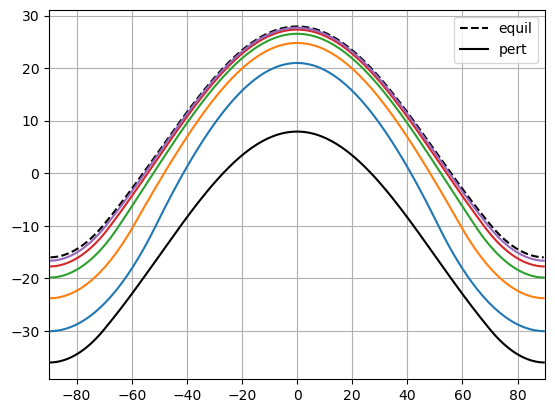

In [7]:
plt.plot( lat, Tequil, 'k--', label='equil' )
plt.plot( lat, model1.Ts, 'k-', label='pert' )
plt.grid(); plt.xlim(-90,90); plt.legend()
for n in range(5):
    model1.integrate_years(years=1.0, verbose=False)
    plt.plot(lat, model1.Ts)

Temperature drifts back towards equilibrium, as we expected!

What if we cool the climate **so much** that the entire planet is ice covered?

In [8]:
model1.Ts -= 40.
model1.compute_diagnostics()

Look again at the change in absorbed shortwave:

In [9]:
climlab.global_mean( model1.ASR - ASRequil )

array(-108.99364173)

It's much larger because we've covered so much more surface area with ice!

The feedback calculation now looks like

$\lambda = - 2 + \frac{-109}{-40} = -2 + 2.7 = +0.7$ W m$^{-2}$ $^{\circ}$C$^{-1}$

What? Looks like the **positive** albedo feedback is so strong here that it has outweighed the **negative** longwave feedback. What will happen to the system now? Let's find out...

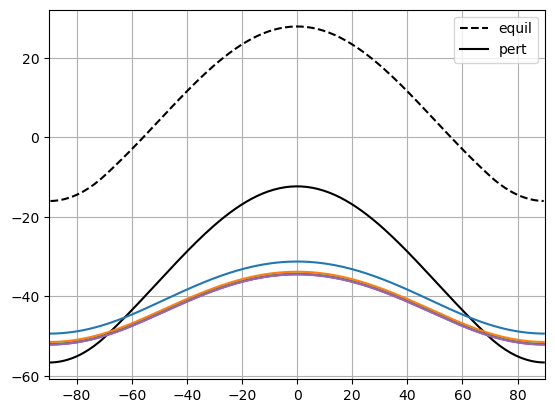

In [10]:
plt.plot( lat, Tequil, 'k--', label='equil' )
plt.plot( lat, model1.Ts, 'k-', label='pert' )
plt.grid(); plt.xlim(-90,90); plt.legend()
for n in range(5):
    model1.integrate_years(years=1.0, verbose=False)
    plt.plot(lat, model1.Ts)

Something **very different** happened! The climate drifted towards an entirely different equilibrium state, in which the entire planet is cold and ice-covered.

We will refer to this as the **SNOWBALL EARTH**.

Note that the warmest spot on the planet is still the equator, but it is now about -33ºC rather than +28ºC!

____________
<a id='section5'></a>

## 5. Here Comes the Sun! Where is the ice edge?
____________

The ice edge in our model is always where the temperature crosses $T_f = -10^\circ$C. The system is at **equilibrium** when the temperature is such that there is a balance between ASR, OLR, and heat transport convergence everywhere. 

Suppose that sun was hotter or cooler at different times (in fact it was significantly cooler during early Earth history). That would mean that the solar constant $S_0 = 4Q$ was larger or smaller. We should expect that the temperature (and thus the ice edge) should increase and decrease as we change $S_0$. 

$S_0$ during the Neoproterozoic Snowball Earth events is believed to be about 93% of its present-day value, or about 1270 W m$^{-2}$.

We are going to look at how the **equilibrium** ice edge depends on $S_0$, by integrating the model out to equilibrium for lots of different values of $S_0$. We will start by slowly decreasing $S_0$, and then slowly increasing $S_0$.

In [11]:
model2 = climlab.EBM_annual(num_lat = 360, **param)

In [12]:
S0array = np.linspace(1400., 1200., 200)

In [13]:
model2.integrate_years(5)

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.


Total elapsed time is 5.000000000000044 years.


In [14]:
print( model2.icelat)

[-71.  71.]


In [15]:
icelat_cooling = np.empty_like(S0array)
icelat_warming = np.empty_like(S0array)

In [16]:
# First cool....
for n in range(S0array.size):
    model2.subprocess['insolation'].S0 = S0array[n]
    model2.integrate_years(10, verbose=False)
    icelat_cooling[n] = np.max(model2.icelat)
# Then warm...
for n in range(S0array.size):
    model2.subprocess['insolation'].S0 = np.flipud(S0array)[n]
    model2.integrate_years(10, verbose=False)
    icelat_warming[n] = np.max(model2.icelat)

KeyboardInterrupt: 

For completeness: also start from present-day conditions and warm up.

In [19]:
model3 = climlab.EBM_annual(num_lat=360, **param)
S0array3 = np.linspace(1350., 1400., 50)
#S0array3 = np.linspace(1350., 1400., 5)
icelat3 = np.empty_like(S0array3)

In [20]:
for n in range(S0array3.size):
    model3.subprocess['insolation'].S0 = S0array3[n]
    model3.integrate_years(10, verbose=False)
    icelat3[n] = np.max(model3.icelat)

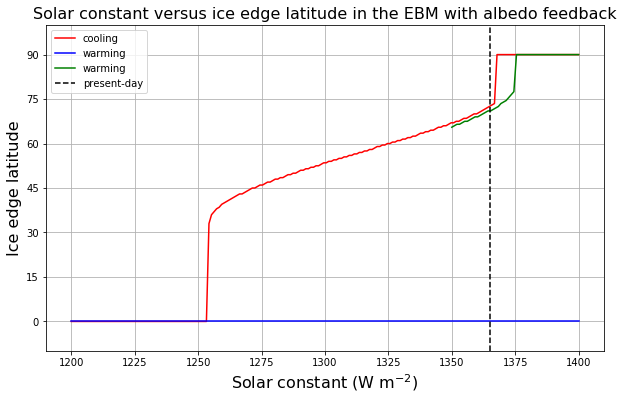

In [21]:
fig = plt.figure( figsize=(10,6) )
ax = fig.add_subplot(111)
ax.plot(S0array, icelat_cooling, 'r-', label='cooling' )
ax.plot(S0array, icelat_warming, 'b-', label='warming' )
ax.plot(S0array3, icelat3, 'g-', label='warming' )
ax.set_ylim(-10,100)
ax.set_yticks((0,15,30,45,60,75,90))
ax.grid()
ax.set_ylabel('Ice edge latitude', fontsize=16)
ax.set_xlabel('Solar constant (W m$^{-2}$)', fontsize=16)
ax.plot( [const.S0, const.S0], [-10, 100], 'k--', label='present-day' )
ax.legend(loc='upper left')
ax.set_title('Solar constant versus ice edge latitude in the EBM with albedo feedback', fontsize=16);

There are actually up to 3 different climates possible for a given value of $S_0$!

### How to un-freeze the Snowball

The graph indicates that if the Earth were completely frozen over, it would be perfectly happy to stay that way even if the sun were brighter and hotter than it is today.

Our EBM predicts that (with present-day parameters) the equilibrium temperature at the equator in the Snowball state is about -33ºC, which is much colder than the threshold temperature $T_f = -10^\circ$C. How can we melt the Snowball?

We need to increase the avaible energy sufficiently to get the equatorial temperatures above this threshold! That is going to require a much larger increase in $S_0$ (could also increase the greenhouse gases, which would have a similar effect)!

Let's crank up the sun to 1830 W m$^{-2}$ (about a 35% increase from present-day).

Integrating for 3600 steps, 14609.688000000002 days, or 40 years.
Total elapsed time is 4044.99999997769 years.
The ice edge is at [-0.  0.] degrees latitude.


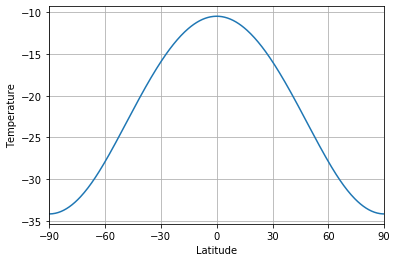

In [22]:
model4 = climlab.process_like(model2)  # initialize with cold Snowball temperature
model4.subprocess['insolation'].S0 = 1830.
model4.integrate_years(40)
plt.plot(model4.lat, model4.Ts)
plt.xlim(-90,90); plt.ylabel('Temperature'); plt.xlabel('Latitude')
plt.grid(); plt.xticks(my_ticks)
print('The ice edge is at ' + str(model4.icelat) + ' degrees latitude.' )

Still a Snowball... but just barely! The temperature at the equator is just below the threshold.

Try to imagine what might happen once it starts to melt. The solar constant is huge, and if it weren't for the highly reflective ice and snow, the climate would be really really hot!

We're going to increase $S_0$ one more time...

Integrating for 900 steps, 3652.4220000000005 days, or 10 years.
Total elapsed time is 4054.999999977441 years.


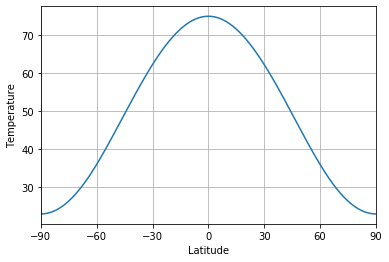

In [23]:
model4.subprocess['insolation'].S0 = 1840.
model4.integrate_years(10)
plt.plot(model4.lat, model4.Ts)
plt.xlim(-90,90); plt.ylabel('Temperature'); plt.xlabel('Latitude')
plt.grid(); plt.xticks(my_ticks);

Suddenly the climate looks very very different again! The global mean temperature is

In [24]:
print( model4.global_mean_temperature() )

57.733554470830796


A roasty 58ºC, and the poles are above 20ºC. A tiny increase in $S_0$ has led to a very drastic change in the climate.

In [25]:
S0array_snowballmelt = np.linspace(1400., 1900., 50)
icelat_snowballmelt = np.empty_like(S0array_snowballmelt)
icelat_snowballmelt_cooling = np.empty_like(S0array_snowballmelt)

for n in range(S0array_snowballmelt.size):
    model2.subprocess['insolation'].S0 = S0array_snowballmelt[n]
    model2.integrate_years(10, verbose=False)
    icelat_snowballmelt[n] = np.max(model2.icelat)
    
for n in range(S0array_snowballmelt.size):
    model2.subprocess['insolation'].S0 = np.flipud(S0array_snowballmelt)[n]
    model2.integrate_years(10, verbose=False)
    icelat_snowballmelt_cooling[n] = np.max(model2.icelat)

Now we will complete the plot of ice edge versus solar constant.

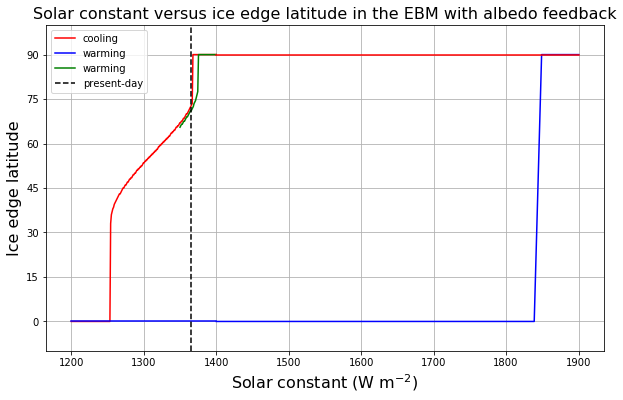

In [26]:
fig = plt.figure( figsize=(10,6) )
ax = fig.add_subplot(111)
ax.plot(S0array, icelat_cooling, 'r-', label='cooling' )
ax.plot(S0array, icelat_warming, 'b-', label='warming' )
ax.plot(S0array3, icelat3, 'g-', label='warming' )
ax.plot(S0array_snowballmelt, icelat_snowballmelt, 'b-' )
ax.plot(S0array_snowballmelt, icelat_snowballmelt_cooling, 'r-' )
ax.set_ylim(-10,100)
ax.set_yticks((0,15,30,45,60,75,90))
ax.grid()
ax.set_ylabel('Ice edge latitude', fontsize=16)
ax.set_xlabel('Solar constant (W m$^{-2}$)', fontsize=16)
ax.plot( [const.S0, const.S0], [-10, 100], 'k--', label='present-day' )
ax.legend(loc='upper left')
ax.set_title('Solar constant versus ice edge latitude in the EBM with albedo feedback', fontsize=16);

The upshot:

- For extremely large $S_0$, the only possible climate is a hot Earth with no ice.
- For extremely small $S_0$, the only possible climate is a cold Earth completely covered in ice.
- For a large range of $S_0$ including the present-day value, more than one climate is possible!
- Once we get into a Snowball Earth state, getting out again is rather difficult!

____________

## Credits

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It is licensed for free and open consumption under the
[Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________